In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GENERAL PLOT OPTIONS
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'

from scipy.interpolate import interp1d
from scipy.integrate import quad

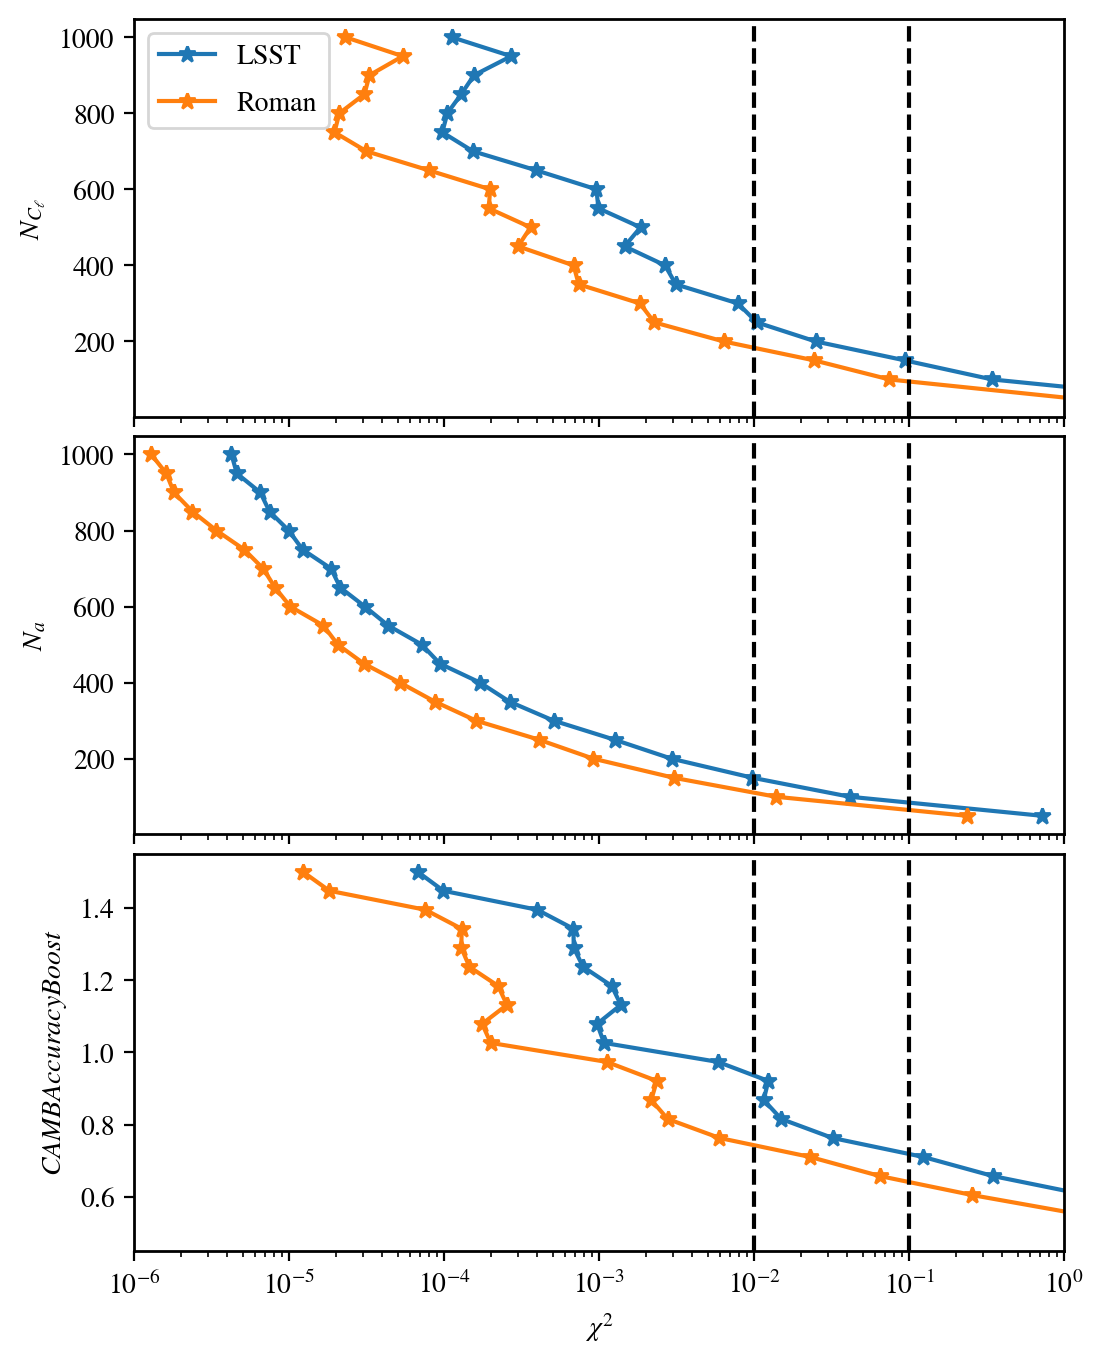

In [2]:
fig,axs = plt.subplots(3,1,figsize=(6,8))
plt.subplots_adjust(hspace=0.05)
xmin = 1e-6
xmax = 1e0

#subplot1
chi2s_lsst = np.loadtxt('./data/lsst_real/chi2s_NCl.txt')
chi2s_roman = np.loadtxt('./data/roman_real/chi2s_NCl.txt')

axs[0].plot(chi2s_lsst[:,1], chi2s_lsst[:,0],  '*-', label='LSST')
axs[0].plot(chi2s_roman[:,1], chi2s_roman[:,0], '*-', label='Roman')
axs[0].set_xlim(xmin, xmax)

axs[0].axvline(ymin=0, ymax=1, x=1e-1, linestyle='--', color='k')
axs[0].axvline(ymin=0, ymax=1, x=1e-2, linestyle='--', color='k')

axs[0].tick_params(axis='x', labelbottom=False)
axs[0].set_xscale('log')
#axs[0].set_yscale('log')
axs[0].set_ylabel(r'$N_{C_\ell}$')
axs[0].legend(['LSST','Roman'])

#subplot2
chi2s_lsst = np.loadtxt('./data/lsst_real/chi2s_Na.txt')
chi2s_roman = np.loadtxt('./data/roman_real/chi2s_Na.txt')

axs[1].plot(chi2s_lsst[:,1], chi2s_lsst[:,0],  '*-', label='LSST')
axs[1].plot(chi2s_roman[:,1], chi2s_roman[:,0], '*-', label='Roman')
axs[1].set_xlim(xmin, xmax)

axs[1].axvline(ymin=0, ymax=1, x=1e-1, linestyle='--', color='k')
axs[1].axvline(ymin=0, ymax=1, x=1e-2, linestyle='--', color='k')

axs[1].tick_params(axis='x', labelbottom=False)
axs[1].set_xscale('log')
#axs[1].set_yscale('log')
axs[1].set_ylabel(r'$N_a$')

#subplot3
chi2s_lsst = np.loadtxt('./data/lsst_real/chi2s_CAMBAB.txt')
chi2s_roman = np.loadtxt('./data/roman_real/chi2s_CAMBAB.txt')

axs[2].plot(chi2s_lsst[:,1], chi2s_lsst[:,0],  '*-', label='LSST')
axs[2].plot(chi2s_roman[:,1], chi2s_roman[:,0], '*-', label='Roman')
axs[2].set_xlim(xmin, xmax)

axs[2].axvline(ymin=0, ymax=1, x=1e-1, linestyle='--', color='k')
axs[2].axvline(ymin=0, ymax=1, x=1e-2, linestyle='--', color='k')

#axs[2].tick_params(axis='x', labelbottom=False)
axs[2].set_xscale('log')
axs[2].set_xlabel(r'$\chi^2$')
axs[2].set_ylabel(r'$CAMB AccuracyBoost$')

plt.savefig('./accuracy_settings.png')
